In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
 #Load the red and white dataset
import pandas as pd # Added this line to import pandas and give it the alias 'pd'

data = pd.read_csv('winequality-red.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [ ]:
 #Load the red and white dataset
import pandas as pd # Added this line to import pandas and give it the alias 'pd'

data2 = pd.read_csv('winequality-white.csv')

In [ ]:
#describe red dataset
print(data.isnull().sum())

In [ ]:
#describe white dataset
print(data2.isnull().sum())

In [ ]:
#summary of the red dataset
print(data.describe())

In [ ]:
#gets the summary of the white dataset
print(data2.describe())

In [ ]:
# Separate red features and target
# Check if 'quality' column exists before dropping
if 'quality' in data.columns:
    X = data.drop('quality', axis=1)
    y = np.where(data['quality'] >= 7, 1, 0)  # Convert quality to binary (>= 7 is high quality)
else:
    print("Warning: 'quality' column not found in data DataFrame. Features and target not separated.")
    X = data  # Assign the entire DataFrame to X if 'quality' is not found
    y = None  # Assign None to y to indicate target not created

# Separate white features and target
# Check if 'quality' column exists before dropping
if 'quality' in data2.columns:
    X2 = data2.drop('quality', axis=1)
    y2 = np.where(data2['quality'] >= 7, 1, 0)  # Convert quality to binary (>= 7 is high quality)
else:
    print("Warning: 'quality' column not found in data2 DataFrame. Features and target not separated.")
    X2 = data2  # Assign the entire DataFrame to X2 if 'quality' is not found
    y2 = None  # Assign None to y2 to indicate target not created

In [ ]:
# Split red data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split white data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
# ---------- Support Vector Machine Accuracy ----------
# Red data
#initialize Support vector Classifier
svm_model = SVC()
#fit t
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
#print how the model looks
print(f'SVM Accuracy (Red): {accuracy_svm * 100: .2f}%')
# White data
svm_model = SVC()
svm_model.fit(X_train2, y_train2)
y_pred_svm2 = svm_model.predict(X_test2)
accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
print(f'SVM Accuracy(White): {accuracy_svm2 * 100: .2f}%')

In [ ]:
# ----------Support Vector Machine Red Training ---------------
# Define red parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Perform red grid search and print best parameters after tuning
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"SVM Accuracy:{grid_search.best_estimator_}")

In [ ]:
#-----------Support Vector Machine White Training -------------
# Define white parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Perform white grid search and print best parameters after tuning
grid_search2 = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search2.fit(X_train2, y_train2)
print(f"Best parameters: {grid_search2.best_params_}")
print(f"SVM Accuracy: {grid_search2.best_estimator_}")

In [ ]:
# --------Support Vector Machine Model and Confusion Matrix ---------------

#print red model after hyper-parameter tuning
print(f"\nClassification Report(Red Wine):")
grid_predictions = grid_search.predict(X_test)
newSVM_Accuracy = accuracy_score(y_test, grid_predictions)
print(f'SVM Accuracy: {newSVM_Accuracy * 100: .2f}%')
print(classification_report(y_test, grid_predictions))


#print white model after hyper-parameter tuning
print(f"\nClassification Report(White Wine):")
grid_predictions2 = grid_search2.predict(X_test2)
newSVM_Accuracy2 = accuracy_score(y_test2, grid_predictions2)
print(f'SVM Accuracy: {newSVM_Accuracy2 * 100: .2f}%')
print(classification_report(y_test2, grid_predictions2))


# SVM confusion matrix for red dataset
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (Red Wine):")
print(cm)
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
#labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Low Quality', 'High Quality'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Low Quality', 'High Quality'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', color='black')

# Title and plot
plt.title('Confusion Matrix - SVM Red Wine Quality Prediction')
plt.show()

# SVM confusion matrix for White dataset
cm2 = confusion_matrix(y_test2, y_pred_svm2)
print("Confusion Matrix (White Wine):")
print(cm2)
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(cm2, cmap=plt.cm.Blues)
fig.colorbar(cax)
#labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Low Quality', 'High Quality'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Low Quality', 'High Quality'])

for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i, s=cm2[i, j], va='center', ha='center', color='black')

# Title and plot
plt.title('Confusion Matrix - SVM White Wine Quality Prediction')
plt.show()

In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the datasets from the uploaded files
# Make sure the file paths are correct, this uses the paths based on your uploads
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

# Check if datasets are loaded correctly by printing the first few rows
print("Red Wine Data Loaded Successfully:")
print(red_wine_data.head())

print("\nWhite Wine Data Loaded Successfully:")
print(white_wine_data.head())

# Convert wine quality into binary classification:
# 0 = low quality (quality < 7), 1 = high quality (quality >= 7)
red_wine_data['quality'] = red_wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)
white_wine_data['quality'] = white_wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# ---------- Red Wine ----------
# Separate features (X) and target (y) for red wine
X_red = red_wine_data.drop('quality', axis=1)  # All columns except 'quality'
y_red = red_wine_data['quality']  # 'quality' column is the target

# Impute missing values for red wine (filling with mean)
imputer = SimpleImputer(strategy='mean')
X_red = imputer.fit_transform(X_red)
# Split red wine data into training and testing sets (80% training, 20% testing)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)


# Standardize the features for red wine using StandardScaler
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Initialize and train the KNN model for red wine
knn_model_red = KNeighborsClassifier(n_neighbors=5)
knn_model_red.fit(X_train_red_scaled, y_train_red)

# Make predictions and calculate accuracy for red wine
y_pred_red = knn_model_red.predict(X_test_red_scaled)
accuracy_red = accuracy_score(y_test_red, y_pred_red)
print(f"\nAccuracy of KNN on Red Wine: {accuracy_red * 100:.2f}%")

# ---------- White Wine ----------
# Separate features (X) and target (y) for white wine
X_white = white_wine_data.drop('quality', axis=1)  # All columns except 'quality'
y_white = white_wine_data['quality']  # 'quality' column is the target

# Impute missing values for white wine
X_white = imputer.fit_transform(X_white)

# Split white wine data into training and testing sets (80% training, 20% testing)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Standardize the features for white wine using StandardScaler
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Initialize and train the KNN model for white wine
knn_model_white = KNeighborsClassifier(n_neighbors=5)
knn_model_white.fit(X_train_white_scaled, y_train_white)

# Make predictions and calculate accuracy for white wine
y_pred_white = knn_model_white.predict(X_test_white_scaled)
accuracy_white = accuracy_score(y_test_white, y_pred_white)
print(f"Accuracy of KNN on White Wine: {accuracy_white * 100:.2f}%")


Red Wine Data Loaded Successfully:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Unnamed: 12  
0      9.4      

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 12']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 12']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


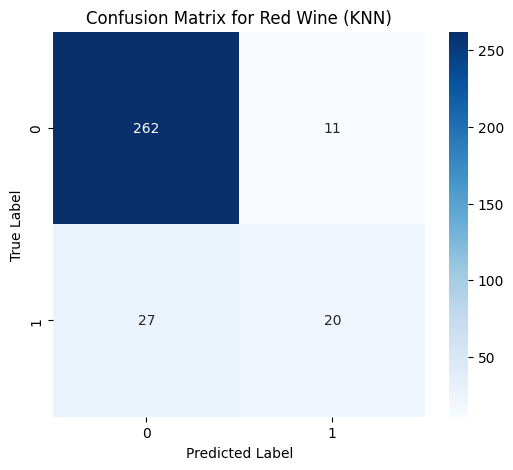

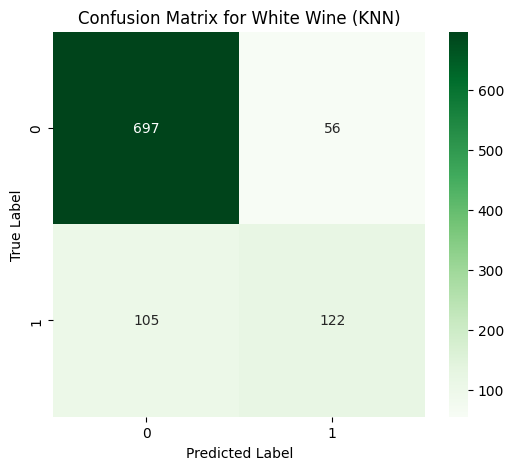

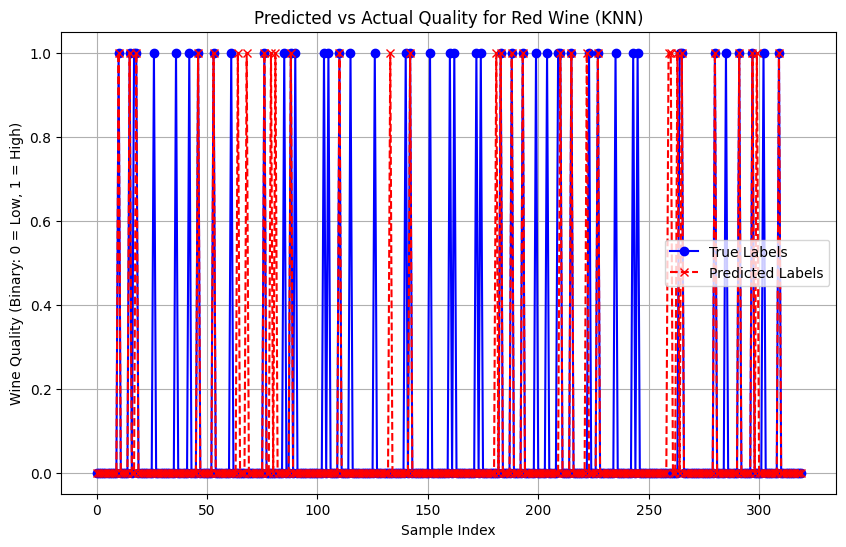

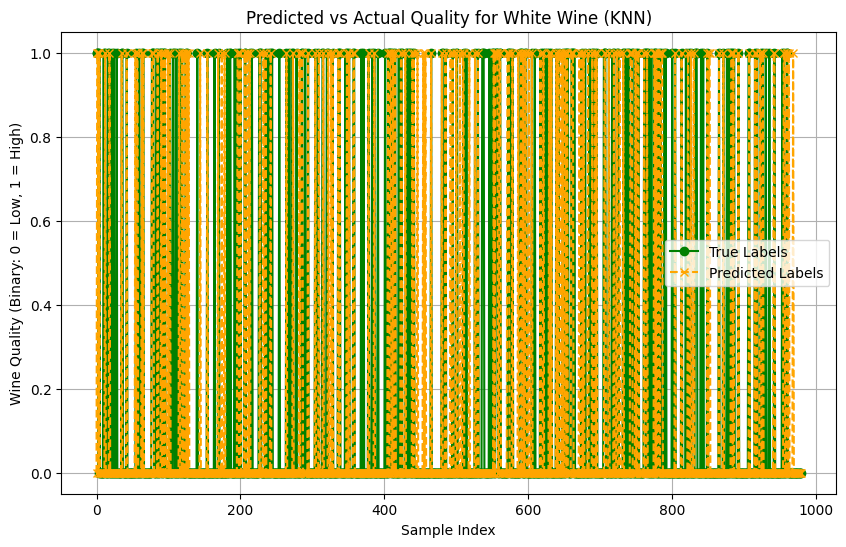

In [66]:
# Import additional necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ---------- Confusion Matrix for Red Wine ----------

conf_matrix_red = confusion_matrix(y_test_red, y_pred_red)

# Plot the confusion matrix for red wine
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_red, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Red Wine (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------- Confusion Matrix for White Wine ----------

conf_matrix_white = confusion_matrix(y_test_white, y_pred_white)

# Plot the confusion matrix for white wine
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_white, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for White Wine (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------- Line Graph: Predicted vs Actual for Red Wine ----------
# Plot the line graph comparing predicted and actual labels for red wine
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_red)), y_test_red, label="True Labels", marker='o', linestyle='-', color='b')
plt.plot(range(len(y_pred_red)), y_pred_red, label="Predicted Labels", marker='x', linestyle='--', color='r')
plt.title("Predicted vs Actual Quality for Red Wine (KNN)")
plt.xlabel("Sample Index")
plt.ylabel("Wine Quality (Binary: 0 = Low, 1 = High)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Line Graph: Predicted vs Actual for White Wine ----------
# Plot the line graph comparing predicted and actual labels for white wine
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_white)), y_test_white, label="True Labels", marker='o', linestyle='-', color='g')
plt.plot(range(len(y_pred_white)), y_pred_white, label="Predicted Labels", marker='x', linestyle='--', color='orange')
plt.title("Predicted vs Actual Quality for White Wine (KNN)")
plt.xlabel("Sample Index")
plt.ylabel("Wine Quality (Binary: 0 = Low, 1 = High)")
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# ---------- Naive Bayes for Red Wine ----------
# Initialize the Naive Bayes model for red wine
nb_model_red = GaussianNB()

# Train the model with the scaled red wine training data
nb_model_red.fit(X_train_red_scaled, y_train_red)

# Make predictions on the red wine test data
y_pred_red_nb = nb_model_red.predict(X_test_red_scaled)

# Calculate the accuracy for red wine
accuracy_red_nb = accuracy_score(y_test_red, y_pred_red_nb)
print(f"Accuracy of Naive Bayes on Red Wine: {accuracy_red_nb * 100:.2f}%")

# ---------- Naive Bayes for White Wine ----------
# Initialize the Naive Bayes model for white wine
nb_model_white = GaussianNB()

# Train the model with the scaled white wine training data
nb_model_white.fit(X_train_white_scaled, y_train_white)

# Make predictions on the white wine test data
y_pred_white_nb = nb_model_white.predict(X_test_white_scaled)

# Calculate the accuracy for white wine
accuracy_white_nb = accuracy_score(y_test_white, y_pred_white_nb)
print(f"Accuracy of Naive Bayes on White Wine: {accuracy_white_nb * 100:.2f}%")


Accuracy of Naive Bayes on Red Wine: 84.69%
Accuracy of Naive Bayes on White Wine: 71.22%


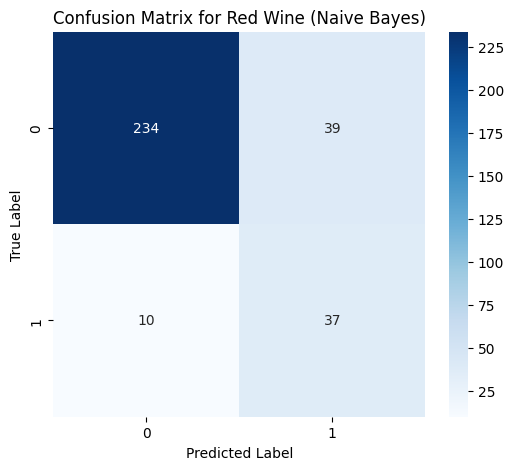

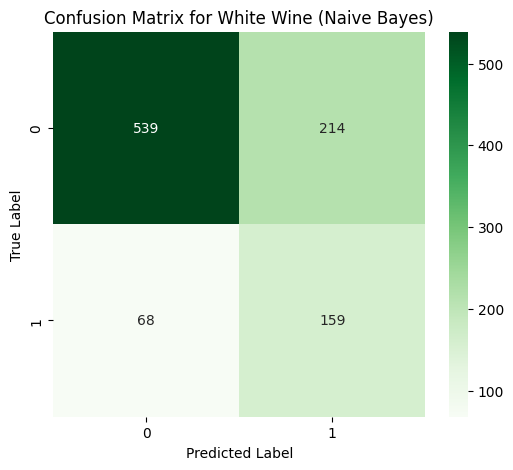

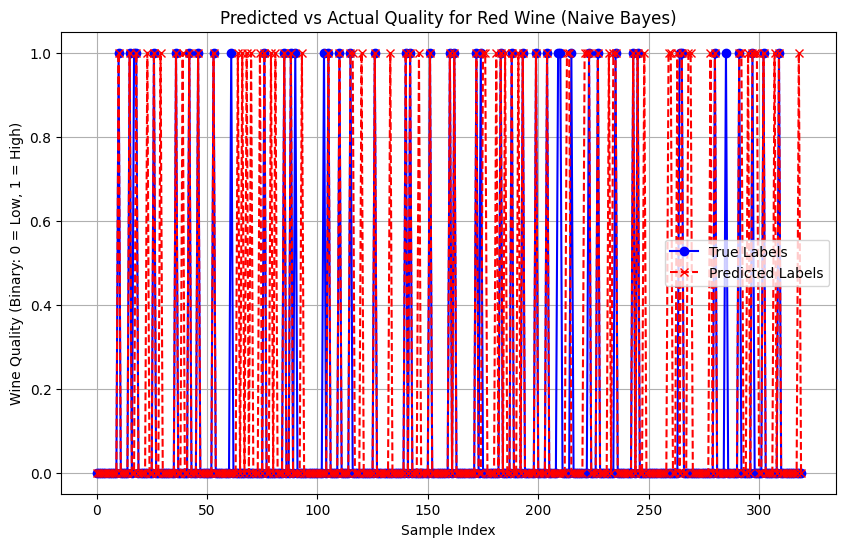

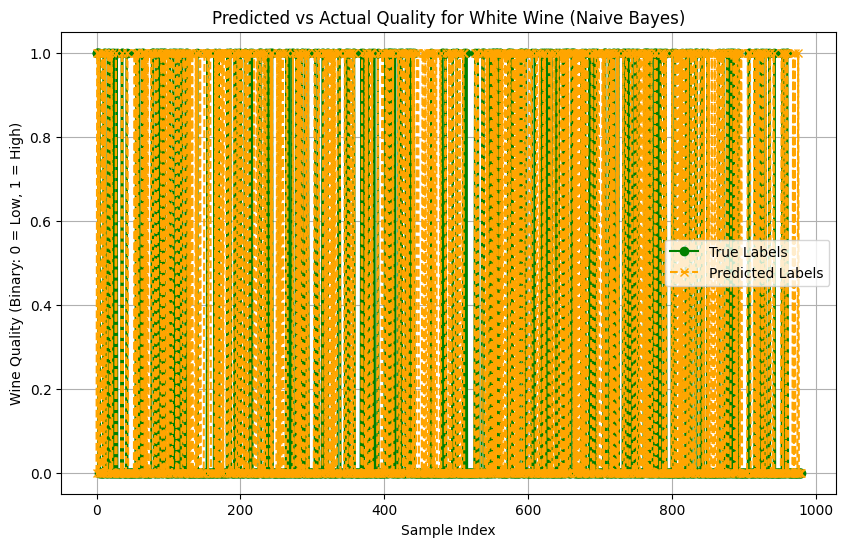

In [63]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ---------- Confusion Matrix for Red Wine (Naive Bayes) ----------
# Generate the confusion matrix for red wine
conf_matrix_red_nb = confusion_matrix(y_test_red, y_pred_red_nb)

# Plot the confusion matrix for red wine
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_red_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Red Wine (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------- Confusion Matrix for White Wine (Naive Bayes) ----------
# Generate the confusion matrix for white wine
conf_matrix_white_nb = confusion_matrix(y_test_white, y_pred_white_nb)

# Plot the confusion matrix for white wine
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_white_nb, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for White Wine (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------- Line Graph: Predicted vs Actual for Red Wine (Naive Bayes) ----------
# Plot the line graph comparing predicted and actual labels for red wine
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_red)), y_test_red, label="True Labels", marker='o', linestyle='-', color='b')
plt.plot(range(len(y_pred_red_nb)), y_pred_red_nb, label="Predicted Labels", marker='x', linestyle='--', color='r')
plt.title("Predicted vs Actual Quality for Red Wine (Naive Bayes)")
plt.xlabel("Sample Index")
plt.ylabel("Wine Quality (Binary: 0 = Low, 1 = High)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Line Graph: Predicted vs Actual for White Wine (Naive Bayes) ----------
# Plot the line graph comparing predicted and actual labels for white wine
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_white)), y_test_white, label="True Labels", marker='o', linestyle='-', color='g')
plt.plot(range(len(y_pred_white_nb)), y_pred_white_nb, label="Predicted Labels", marker='x', linestyle='--', color='orange')
plt.title("Predicted vs Actual Quality for White Wine (Naive Bayes)")
plt.xlabel("Sample Index")
plt.ylabel("Wine Quality (Binary: 0 = Low, 1 = High)")
plt.legend()
plt.grid(True)
plt.show()


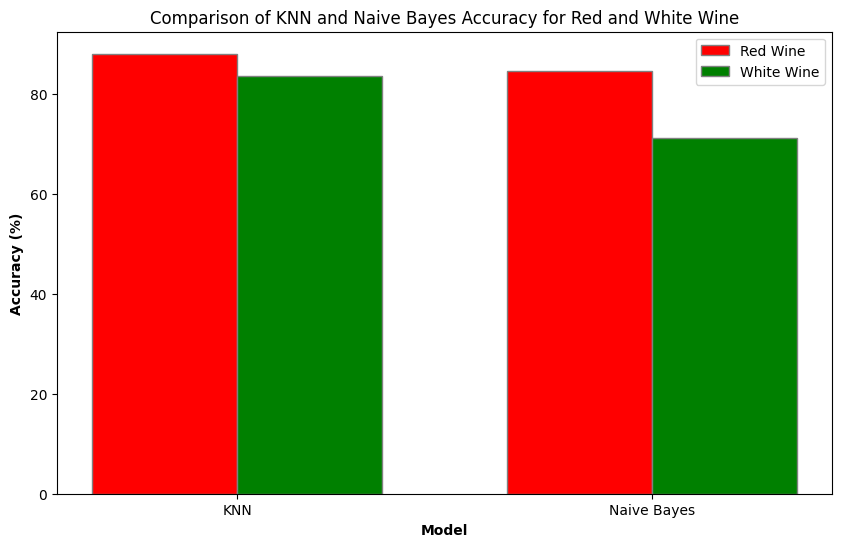

In [62]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ---------- Train and Predict with KNN for Red Wine ----------
# Initialize KNN model for red wine
knn_model_red = KNeighborsClassifier(n_neighbors=5)

# Train the model with red wine training data
knn_model_red.fit(X_train_red_scaled, y_train_red)

# Make predictions for red wine
y_pred_red_knn = knn_model_red.predict(X_test_red_scaled)

# ---------- Train and Predict with KNN for White Wine ----------
# Initialize KNN model for white wine
knn_model_white = KNeighborsClassifier(n_neighbors=5)

# Train the model with white wine training data
knn_model_white.fit(X_train_white_scaled, y_train_white)

# Make predictions for white wine
y_pred_white_knn = knn_model_white.predict(X_test_white_scaled)

# ---------- Calculate Accuracies for KNN and Naive Bayes ----------
# Calculate the accuracy for KNN (Red Wine)
accuracy_knn_red = accuracy_score(y_test_red, y_pred_red_knn) * 100

# Calculate the accuracy for KNN (White Wine)
accuracy_knn_white = accuracy_score(y_test_white, y_pred_white_knn) * 100

# For Naive Bayes, use the previously calculated predictions and accuracies
accuracy_nb_red = accuracy_score(y_test_red, y_pred_red_nb) * 100
accuracy_nb_white = accuracy_score(y_test_white, y_pred_white_nb) * 100

# Data for plotting
models = ['KNN', 'Naive Bayes']
red_wine_accuracies = [accuracy_knn_red, accuracy_nb_red]
white_wine_accuracies = [accuracy_knn_white, accuracy_nb_white]

# Set up bar positions
bar_width = 0.35
r1 = np.arange(len(models))  # Positions for red wine bars
r2 = [x + bar_width for x in r1]  # Positions for white wine bars

# Create the bar graph
plt.figure(figsize=(10, 6))

# Plot bars for red wine
plt.bar(r1, red_wine_accuracies, color='red', width=bar_width, edgecolor='grey', label='Red Wine')

# Plot bars for white wine
plt.bar(r2, white_wine_accuracies, color='green', width=bar_width, edgecolor='grey', label='White Wine')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Comparison of KNN and Naive Bayes Accuracy for Red and White Wine')

# Add xticks on the middle of the bars
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

white_wine_file = '/content/drive/My Drive/white_wine_quality.xlsx'
red_wine_file = '/content/drive/My Drive/red_wine_quality.xlsx'

white_wine_data = pd.read_excel(white_wine_file)
red_wine_data = pd.read_excel(red_wine_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -------- Decision Tree Accuracy -------- #

# Split the data into training and testing sets
# White wine
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Red wine
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# White wine
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Red wine
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Hyperparameter Tuning using GridSearchCV
# Define the hyperparameters grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV for White Wine
grid_search_white = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_white.fit(X_train_white_scaled, y_train_white)

# Initialize GridSearchCV for Red Wine
grid_search_red = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_red.fit(X_train_red_scaled, y_train_red)

# Predictions using the best models found by GridSearchCV
y_test_pred_white = grid_search_white.best_estimator_.predict(X_test_white_scaled)  # White wine predictions
y_test_pred_red = grid_search_red.best_estimator_.predict(X_test_red_scaled)  # Red wine predictions

# Evaluate the performance of the tuned models
accuracy_test_white = accuracy_score(y_test_white, y_test_pred_white)
accuracy_test_red = accuracy_score(y_test_red, y_test_pred_red)

# Print accuracy scores
print(f"\nWhite Wine Test Accuracy: {accuracy_test_white * 100:.2f}%")
print(f"\nRed Wine Test Accuracy: {accuracy_test_red * 100:.2f}%")

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
# -------- Red Wine Decision Tree --------#
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the red wine dataset
red_wine_file = '/content/drive/My Drive/red_wine_quality.xlsx'
red_wine_data = pd.read_excel(red_wine_file)

# Define Features (X) and Target (y)
X_red = red_wine_data.iloc[:, :-1]  # Features
y_red = red_wine_data.iloc[:, -1]   # Labels

# Split the data into training and testing sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train_red, y_train_red)

# Adjusting the size of the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          filled=True,
          feature_names=X_red.columns,
          class_names=y_red.unique().astype(str),  # Convert to string array
          rounded=True)
plt.title("Decision Tree for Red Wine Quality")
plt.show()

In [ ]:
# -------- White Wine Decision Tree --------#
X_white = white_wine_data.iloc[:, :-1]  # Features
y_white = white_wine_data.iloc[:, -1]   # Labels

# Split the data into training and testing sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train_white, y_train_white)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the size of the figure as needed
plot_tree(dt_model,
          filled=True,
          feature_names=X_white.columns,
          class_names=y_white.unique().astype(str),  # Convert to string array
          rounded=True)
plt.title("Decision Tree for White Wine Quality")
plt.show()

In [ ]:
# -------- Confusion Matrix -------- #
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the data into 80% training and 20% testing sets

# White wine
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Red wine
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Standardize the features for White and Red wine datasets

# White wine
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Red wine
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Train the Decision Tree model
# Decision Tree for White Wine
dt_model_white = DecisionTreeClassifier(random_state=42)
dt_model_white.fit(X_train_white_scaled, y_train_white)

# Decision Tree for Red Wine
dt_model_red = DecisionTreeClassifier(random_state=42)
dt_model_red.fit(X_train_red_scaled, y_train_red)

# White wine predictions
y_pred_white = dt_model_white.predict(X_test_white_scaled)

# Red wine predictions
y_pred_red = dt_model_red.predict(X_test_red_scaled)

# Confusion Matrix for Red Wine
cm_red = confusion_matrix(y_test_red, y_pred_red)
print("Confusion Matrix (Red Wine):")
print(cm_red)

# Plot confusion matrix for Red Wine
disp_red = ConfusionMatrixDisplay(confusion_matrix=cm_red, display_labels=np.unique(np.concatenate([y_test_red, y_pred_red])))
disp_red.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Red Wine Quality Prediction')
plt.show()

# Confusion Matrix for White Wine
cm_white = confusion_matrix(y_test_white, y_pred_white)
print("Confusion Matrix (White Wine):")
print(cm_white)

# Plot confusion matrix for White Wine
disp_white = ConfusionMatrixDisplay(confusion_matrix=cm_white, display_labels=np.unique(np.concatenate([y_test_white, y_pred_white])))
disp_white.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree White Wine Quality Prediction')
plt.show()


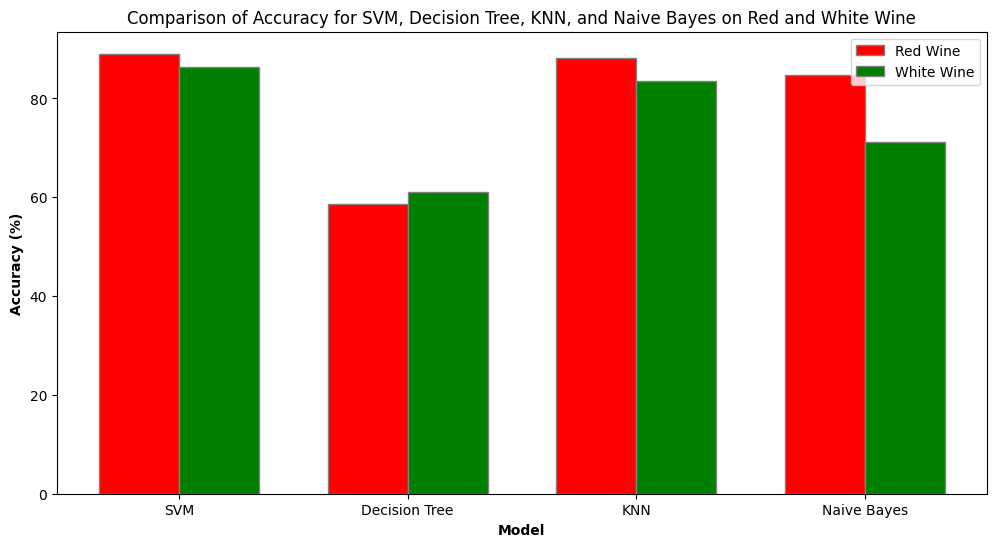

In [64]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# ---------- Data for Plotting ----------
models = ['SVM', 'Decision Tree', 'KNN', 'Naive Bayes']

# Specified accuracies for red and white wines
red_wine_accuracies = [89.06, 58.57, 88.12, 84.69]  # Red wine accuracy values
white_wine_accuracies = [86.33, 61.02, 83.57, 71.22]  # White wine accuracy values

# Set up bar positions
bar_width = 0.35
r1 = np.arange(len(models))  # Positions for red wine bars
r2 = [x + bar_width for x in r1]  # Positions for white wine bars

# Create the bar graph
plt.figure(figsize=(12, 6))

# Plot bars for red wine
plt.bar(r1, red_wine_accuracies, color='red', width=bar_width, edgecolor='grey', label='Red Wine')

# Plot bars for white wine
plt.bar(r2, white_wine_accuracies, color='green', width=bar_width, edgecolor='grey', label='White Wine')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Comparison of Accuracy for SVM, Decision Tree, KNN, and Naive Bayes on Red and White Wine')

# Add xticks on the middle of the bars
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)

# Add a legend
plt.legend()

# Show the plot
plt.show()
